# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [ ]:
!python -m pip install kaggle==1.6.12

In [ ]:
!pip install --target=/workspace ucimlrepo

**Note:** Restart the kernel to use updated package(s).

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

Finding the right datasets can be time-consuming. Here we provide you with a list of websites to start with. But we encourage you to explore more websites and find the data that interests you.

* Google Dataset Search https://datasetsearch.research.google.com/
* The U.S. Government’s open data https://data.gov/
* UCI Machine Learning Repository https://archive.ics.uci.edu/ml/index.php


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

Dataset 1: Weather Data
Type: JSON from API Method: Programmatically downloaded using the NOAA API. Variables: date: The date of the weather observation. datatype: Type of weather measurement (e.g., PRCP for precipitation). station: Weather station ID. attributes: Additional attributes. value: Measurement value (e.g., amount of precipitation).

In [33]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the API endpoint and parameters
url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
params = {
    'datasetid': 'GHCND',
    'locationid': 'CITY:US390029',  # Example location ID for Columbus, OH
    'startdate': '2023-01-01',       # ISO format date
    'enddate': '2023-12-31',         # ISO format date
    'limit': 600,
    'units': 'metric'
}
headers = {
    'token': 'HbzrgzFpsNZMCAqrdmajXoPhACSSBUrj'
}

# Make the API request
response = requests.get(url, headers=headers, params=params)
data = response.json()

# Convert the data to a DataFrame
weather_data = pd.DataFrame(data['results'])

# Save the data to a CSV file
weather_data.to_csv('weather_data.csv', index=False)

Dataset 2: Traffic Data
Type: CSV File Method: Manually downloaded. Variables: Date Of Stop: The date when the traffic stop occurred. Time Of Stop: The time when the traffic stop occurred. Description: Description of the traffic incident. Location: The location of the incident. Latitude: Latitude coordinate of the incident. Longitude: Longitude coordinate of the incident. Accident: Whether the incident involved an accident (Yes/No). Race: The race of the driver. Gender: The gender of the driver. Driver City: The city where the driver resides. Driver State: The state where the driver resides.

In [3]:
# Load the traffic accident data
traffic_data = pd.read_csv('traffic_accidents.csv')

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [4]:
weather_data = pd.read_csv('weather_data.csv')
# Display the first few rows of the dataset 1
print(weather_data.head())
# Check for missing values
print(weather_data.isnull().sum())

                  date datatype            station attributes    value
0  2023-01-01T00:00:00     PRCP  GHCND:US1OHMK0013   ,,N,0700      0.0
1  2023-01-01T00:00:00     SNOW  GHCND:US1OHMK0013   ,,N,0700      0.0
2  2023-01-01T00:00:00     ADPT  GHCND:USW00093824       ,,W,     67.0
3  2023-01-01T00:00:00     ASLP  GHCND:USW00093824       ,,W,  10166.0
4  2023-01-01T00:00:00     ASTP  GHCND:USW00093824       ,,W,   9831.0
date          0
datatype      0
station       0
attributes    0
value         0
dtype: int64


In [5]:
# Display the first few rows of the traffic data
print(traffic_data.head())

# Check for missing values
print(traffic_data.isnull().sum())

                                  SeqID Date Of Stop Time Of Stop Agency  \
0  52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca   01/01/2023     23:11:00    MCP   
1  9be35886-e00c-49c2-8f27-2f6307696a17   01/25/2023     00:20:00    MCP   
2  9be35886-e00c-49c2-8f27-2f6307696a17   01/25/2023     00:20:00    MCP   
3  4d37fa99-0df3-4a56-9ba6-692bce894a34   01/26/2023     09:16:00    MCP   
4  3a723e9a-5dc0-4bc3-9bd9-4555d6ce0e49   01/25/2023     05:45:00    MCP   

                                         SubAgency  \
0                      3rd District, Silver Spring   
1  6th District, Gaithersburg / Montgomery Village   
2  6th District, Gaithersburg / Montgomery Village   
3                            4th District, Wheaton   
4                            4th District, Wheaton   

                                         Description  \
0    OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY   
1  FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...   
2  DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B.

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

## Quality Issue 1: Missing Values in Weather Data

In [6]:
# Display the first few rows of the weather data
print(weather_data.head())

                  date datatype            station attributes    value
0  2023-01-01T00:00:00     PRCP  GHCND:US1OHMK0013   ,,N,0700      0.0
1  2023-01-01T00:00:00     SNOW  GHCND:US1OHMK0013   ,,N,0700      0.0
2  2023-01-01T00:00:00     ADPT  GHCND:USW00093824       ,,W,     67.0
3  2023-01-01T00:00:00     ASLP  GHCND:USW00093824       ,,W,  10166.0
4  2023-01-01T00:00:00     ASTP  GHCND:USW00093824       ,,W,   9831.0


In [7]:
# Check for missing values in the weather data
print(weather_data.isnull().sum())

date          0
datatype      0
station       0
attributes    0
value         0
dtype: int64


Issue and justification: The attributes column has missing values, which may indicate missing or incomplete weather observations. Missing data can lead to inaccurate analysis and conclusions.

### Quality Issue 2: Missing or Zero Coordinates in Traffic Data

In [8]:
# Display the first few rows of the traffic data
print(traffic_data.head())

                                  SeqID Date Of Stop Time Of Stop Agency  \
0  52282e8c-f2e1-4bb5-8509-2d5e4f8da8ca   01/01/2023     23:11:00    MCP   
1  9be35886-e00c-49c2-8f27-2f6307696a17   01/25/2023     00:20:00    MCP   
2  9be35886-e00c-49c2-8f27-2f6307696a17   01/25/2023     00:20:00    MCP   
3  4d37fa99-0df3-4a56-9ba6-692bce894a34   01/26/2023     09:16:00    MCP   
4  3a723e9a-5dc0-4bc3-9bd9-4555d6ce0e49   01/25/2023     05:45:00    MCP   

                                         SubAgency  \
0                      3rd District, Silver Spring   
1  6th District, Gaithersburg / Montgomery Village   
2  6th District, Gaithersburg / Montgomery Village   
3                            4th District, Wheaton   
4                            4th District, Wheaton   

                                         Description  \
0    OPERATING UNREGISTERED MOTOR VEHICLE ON HIGHWAY   
1  FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...   
2  DISPLAYING EXPIRED REGISTRATION PLATE ISSUED B.

In [9]:
# Check for missing values in latitude and longitude columns
print(traffic_data[['Latitude', 'Longitude']].isnull().sum())

# Check for rows with zero coordinates
print(traffic_data[(traffic_data['Latitude'] == 0) & (traffic_data['Longitude'] == 0)].shape)

Latitude     0
Longitude    0
dtype: int64
(96, 43)


Issue and justification: Issue and justification: Some rows in the traffic data have zero coordinates (0, 0), indicating incorrect or missing location data. Accurate location data is crucial for spatial analysis and mapping of traffic incidents.

### Tidiness Issue 1: Date and Time Columns in Traffic Data

In [10]:
# Display the columns of the traffic data
print(traffic_data.columns)

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')


In [11]:
# Check the data types of the columns
print(traffic_data.dtypes)

SeqID                       object
Date Of Stop                object
Time Of Stop                object
Agency                      object
SubAgency                   object
Description                 object
Location                    object
Latitude                   float64
Longitude                  float64
Accident                    object
Belts                       object
Personal Injury             object
Property Damage             object
Fatal                       object
Commercial License          object
HAZMAT                      object
Commercial Vehicle          object
Alcohol                     object
Work Zone                   object
Search Conducted            object
Search Disposition          object
Search Outcome              object
Search Reason               object
Search Reason For Stop      object
Search Type                 object
Search Arrest Reason        object
State                       object
VehicleType                 object
Year                

Issue and justification: Issue and justification: The Date Of Stop and Time Of Stop columns are separate, but they should be combined into a single DateTime column for easier analysis and consistency with best practices in data wrangling.

### Tidiness Issue 2: Unnecessary Columns in Traffic Data

In [12]:
# Display the columns of the traffic data
print(traffic_data.columns)

Index(['SeqID', 'Date Of Stop', 'Time Of Stop', 'Agency', 'SubAgency',
       'Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Article',
       'Contributed To Accident', 'Race', 'Gender', 'Driver City',
       'Driver State', 'DL State', 'Arrest Type', 'Geolocation'],
      dtype='object')


In [13]:
# Check the number of columns and their data types
print(traffic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeqID                    799 non-null    object 
 1   Date Of Stop             799 non-null    object 
 2   Time Of Stop             799 non-null    object 
 3   Agency                   799 non-null    object 
 4   SubAgency                799 non-null    object 
 5   Description              799 non-null    object 
 6   Location                 799 non-null    object 
 7   Latitude                 799 non-null    float64
 8   Longitude                799 non-null    float64
 9   Accident                 799 non-null    object 
 10  Belts                    799 non-null    object 
 11  Personal Injury          799 non-null    object 
 12  Property Damage          799 non-null    object 
 13  Fatal                    799 non-null    object 
 14  Commercial License       7

Issue and justification: Columns such as SeqID, Agency, SubAgency, attributes, and Article are not necessary for our analysis and should be removed to simplify the dataset and focus on relevant information.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [14]:
#To ensure the raw dataframes are not impacted, we'll make copies of the datasets.
weather_data_clean = weather_data.copy()
traffic_data_clean = traffic_data.copy()

### **Quality Issue 1: Missing Values in Weather Data**

In [15]:
# Remove rows with missing values in the 'attributes' column
weather_data_clean = weather_data_clean.dropna(subset=['attributes'])

In [16]:
# Check for missing values again
print(weather_data_clean.isnull().sum())

date          0
datatype      0
station       0
attributes    0
value         0
dtype: int64


Justification: Removing rows with missing values in the attributes column ensures we have complete data for analysis, reducing the risk of inaccuracies.

### **Quality Issue 2: Missing or Zero Coordinates in Traffic Data**

In [17]:
#Remove rows with zero coordinates
traffic_data_clean = traffic_data_clean[(traffic_data_clean['Latitude'] != 0) & (traffic_data_clean['Longitude'] != 0)]

In [18]:
# Check for zero coordinates again
print(traffic_data_clean[(traffic_data_clean['Latitude'] == 0) & (traffic_data_clean['Longitude'] == 0)].shape)

(0, 43)


Justification:Removing rows with zero coordinates ensures that location data is accurate and meaningful for spatial analysis.

### **Tidiness Issue 1: Date and Time Columns in Traffic Data**

In [19]:
# Combine 'Date Of Stop' and 'Time Of Stop' into a single 'DateTime' column
traffic_data_clean['DateTime'] = pd.to_datetime(traffic_data_clean['Date Of Stop'] + 'T' + traffic_data_clean['Time Of Stop'])
# Drop the original 'Date Of Stop' and 'Time Of Stop' columns
traffic_data_clean = traffic_data_clean.drop(columns=['Date Of Stop', 'Time Of Stop'])

In [20]:
# Check the new 'DateTime' column
print(traffic_data_clean[['DateTime']].head())

              DateTime
1  2023-01-25 00:20:00
2  2023-01-25 00:20:00
3  2023-01-26 09:16:00
9  2023-01-24 23:25:00
10 2023-01-24 23:25:00


Justification: Combining the date and time columns simplifies the dataset and ensures consistent time-based analysis.

### **Tidiness Issue 2: Unnecessary Columns in Traffic Data**

In [21]:
# Remove unnecessary columns
columns_to_drop = ['SeqID', 'Agency', 'SubAgency', 'Article']
traffic_data_clean = traffic_data_clean.drop(columns=columns_to_drop)

In [22]:
# Check the remaining columns
print(traffic_data_clean.columns)

Index(['Description', 'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'Personal Injury', 'Property Damage', 'Fatal', 'Commercial License',
       'HAZMAT', 'Commercial Vehicle', 'Alcohol', 'Work Zone',
       'Search Conducted', 'Search Disposition', 'Search Outcome',
       'Search Reason', 'Search Reason For Stop', 'Search Type',
       'Search Arrest Reason', 'State', 'VehicleType', 'Year', 'Make', 'Model',
       'Color', 'Violation Type', 'Charge', 'Contributed To Accident', 'Race',
       'Gender', 'Driver City', 'Driver State', 'DL State', 'Arrest Type',
       'Geolocation', 'DateTime'],
      dtype='object')


Justification: Removing unnecessary columns simplifies the dataset and focuses on relevant information for analysis

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [23]:
# For weather data, keep only relevant columns
weather_data_clean = weather_data_clean[['date', 'datatype', 'value']]

# For traffic data, keep only relevant columns
traffic_data_clean = traffic_data_clean[['DateTime', 'Location', 'Latitude', 'Longitude', 'Description', 'Race', 'Gender']]

In [28]:
# Convert 'date' column in weather_data_clean to datetime
weather_data_clean['date'] = pd.to_datetime(weather_data_clean['date'], errors='coerce')
print(weather_data_clean['date'].dtype)  # Should be datetime64[ns]

# Truncate the time component
weather_data_clean['date'] = weather_data_clean['date'].dt.date
traffic_data_clean['DateTime'] = traffic_data_clean['DateTime'].dt.date

combined_data = pd.merge(weather_data_clean, traffic_data_clean, left_on='date', right_on='DateTime', how='inner')

datetime64[ns]


In [29]:
print(combined_data.head())

         date datatype  value    DateTime  \
0  2023-01-01     PRCP    0.0  2023-01-01   
1  2023-01-01     PRCP    0.0  2023-01-01   
2  2023-01-01     PRCP    0.0  2023-01-01   
3  2023-01-01     PRCP    0.0  2023-01-01   
4  2023-01-01     PRCP    0.0  2023-01-01   

                              Location   Latitude  Longitude  \
0       NEW HAMPSHIRE / LOCKWOOD DRIVE  39.045523 -76.990480   
1               BEL PRE RD/ ARCTIC AVE  39.096611 -77.095559   
2  GREAT SENECA HWY @ FOUNTAIN CLUB RD  39.159977 -77.275110   
3        FREDERICK RD/ PROFESSIONAL DR  39.161040 -77.222383   
4          FREDERICK RD @ ROSECREST DR  39.218500 -77.255848   

                                         Description      Race Gender  
0  DRIVING VEHICLE WHILE UNDER THE INFLUENCE OF A...     BLACK      M  
1                       FAILURE TO STOP AT STOP SIGN     BLACK      M  
2         EXCEEDING THE POSTED SPEED LIMIT OF 35 MPH  HISPANIC      F  
3         EXCEEDING THE POSTED SPEED LIMIT OF 40 MPH    

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [31]:
# Save the cleaned datasets
weather_data_clean.to_csv('cleaned_weather_data.csv', index=False)
traffic_data_clean.to_csv('cleaned_traffic_data.csv', index=False)
combined_data.to_csv('combined_data.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* Does weather condition (e.g., precipitation) impact the frequency and nature of traffic violations in Columbus, OH?

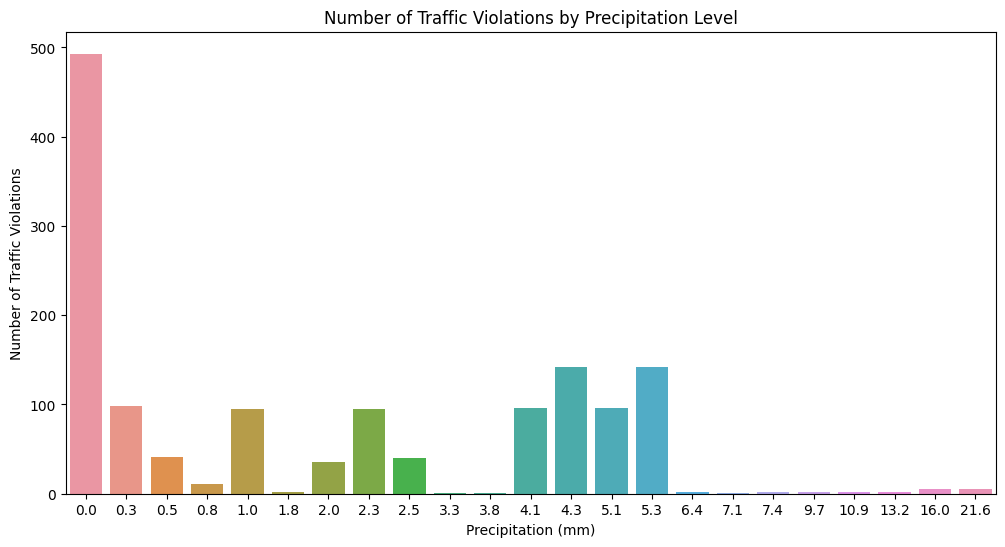

In [34]:
import matplotlib.pyplot as plt
# Extract relevant data for the first visualization
weather_traffic_data = combined_data[['datatype', 'value', 'Description']]

# Filter for precipitation data
precipitation_data = weather_traffic_data[weather_traffic_data['datatype'] == 'PRCP']

# Count the number of violations per precipitation value
precipitation_data = precipitation_data.groupby('value').size().reset_index(name='Violation Count')

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='value', y='Violation Count', data=precipitation_data)
plt.xlabel('Precipitation (mm)')
plt.ylabel('Number of Traffic Violations')
plt.title('Number of Traffic Violations by Precipitation Level')
plt.show()

*Answer to research question:* The bar plot shows the number of traffic violations at different levels of precipitation. This visualization helps us understand if there is a correlation between precipitation levels and the frequency of traffic violations. If the bars show a noticeable trend (e.g., more violations with higher precipitation), it indicates that weather conditions like rain can affect driving behavior.

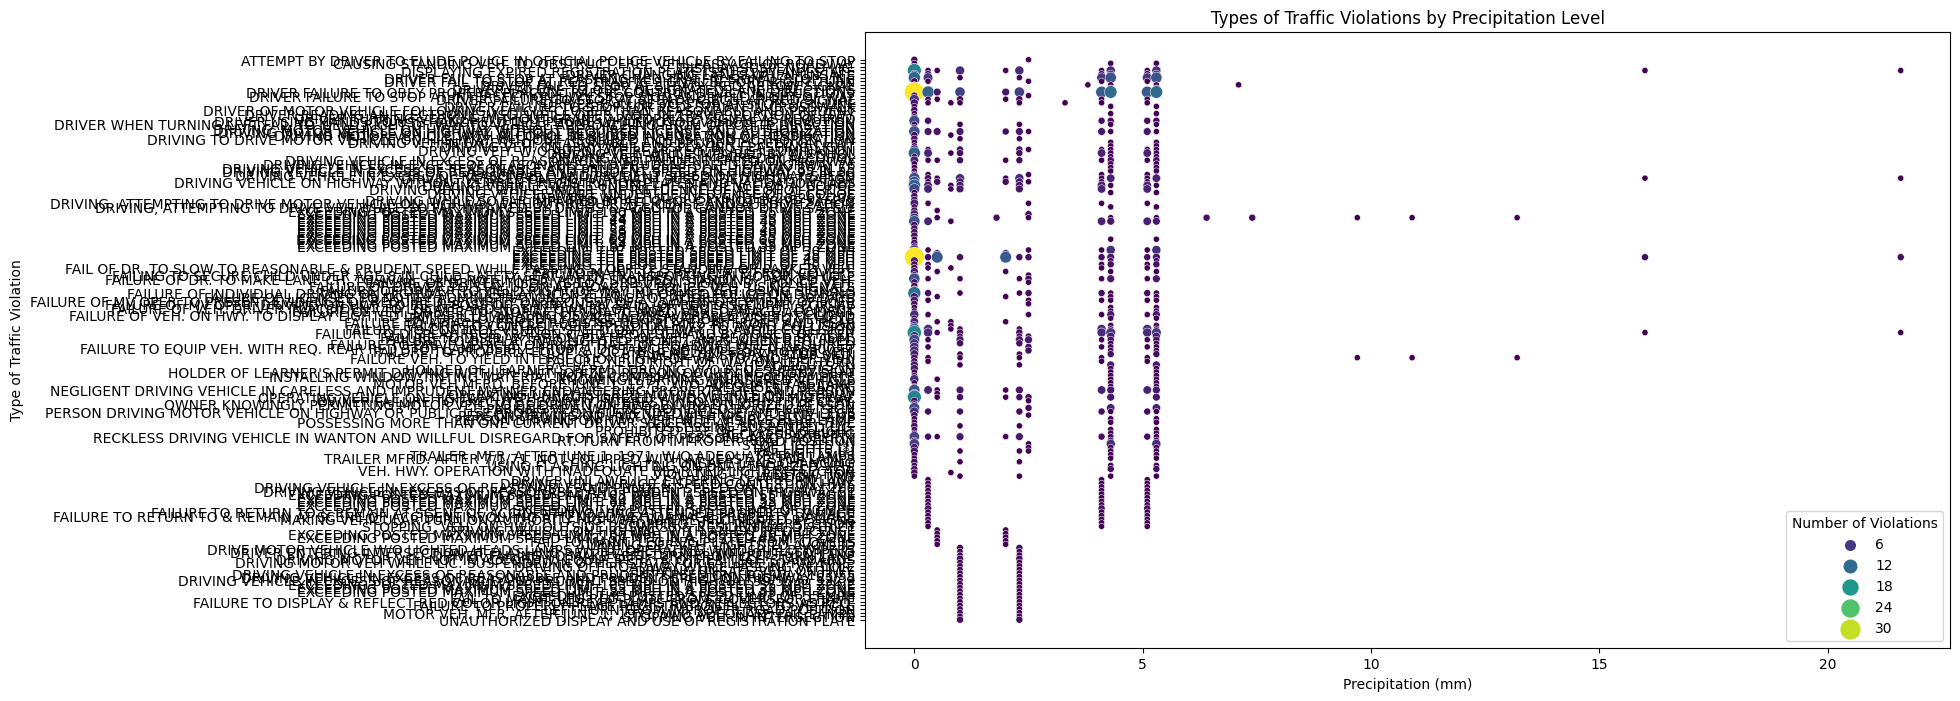

In [35]:
# Count the types of violations during different precipitation levels
violation_types = combined_data[combined_data['datatype'] == 'PRCP']
violation_types = violation_types.groupby(['value', 'Description']).size().reset_index(name='Count')

# Plotting
plt.figure(figsize=(14, 8))
sns.scatterplot(x='value', y='Description', size='Count', hue='Count', data=violation_types, palette='viridis', sizes=(20, 200))
plt.xlabel('Precipitation (mm)')
plt.ylabel('Type of Traffic Violation')
plt.title('Types of Traffic Violations by Precipitation Level')
plt.legend(title='Number of Violations')
plt.show()

*Answer to research question:* The scatter plot shows the types of traffic violations at different precipitation levels. The size and color intensity of the points indicate the number of violations. This visualization helps identify specific types of violations that are more common under certain weather conditions. For example, if "Speeding" violations are more frequent during high precipitation, it suggests that drivers may have difficulty controlling their speed in rainy conditions.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:*  If I had more time to complete the project, I would further investigate the impact of other weather conditions (such as temperature, wind speed, and visibility) on traffic violations. Additionally, I would explore the temporal aspect of the data by analyzing trends over different times of the day or seasons. Improving data quality by filling missing values and standardizing the data would also be a priority to ensure more accurate analysis. Furthermore, I would consider using more advanced statistical methods or machine learning models to establish stronger correlations and make predictive analyses